In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc = {"figure.figsize":(10,8)}) 
sns.set(font_scale=1.25)

In [2]:
train_data =pd.read_csv('pfm_train.csv')
test_data =pd.read_csv('pfm_test.csv')
train_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,...,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,...,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,...,1,80,2,1,2,3,1,0,0,0


In [3]:
train_data.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


1. StandardHours 方差是0，说明数据值全一样，drop
2. EmployeeNumber 员工id，没有意义，drop
3. Age 最小值18，所以Over18 可以drop

In [4]:
train_data.drop(['Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)

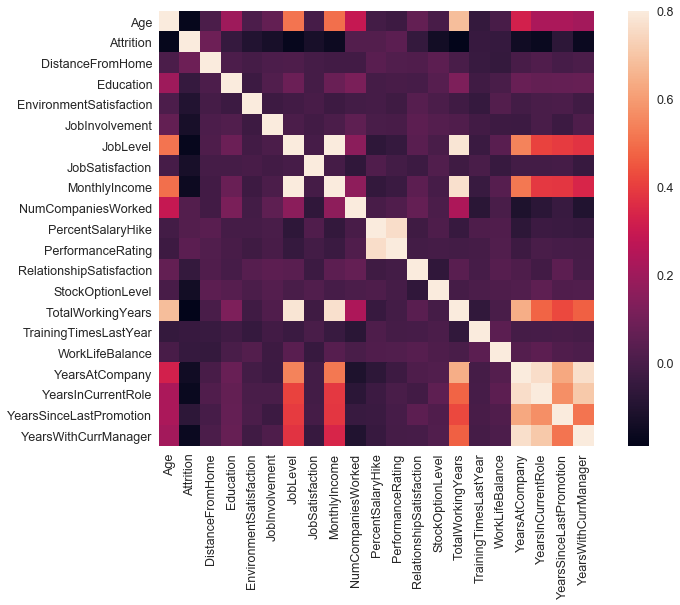

In [5]:
#correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, vmax=0.8, square=True)

JobLevel、MothlyIncome、TotalWorkingYears想关性强；
PercentSalaryHike、PerformanceRating相关性强。
删除JobLevel、TotalWorkingYears、PerformanceRating特征

In [6]:
train_data.drop(['JobLevel','TotalWorkingYears','PerformanceRating'],axis=1,inplace=True)

In [7]:
train_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

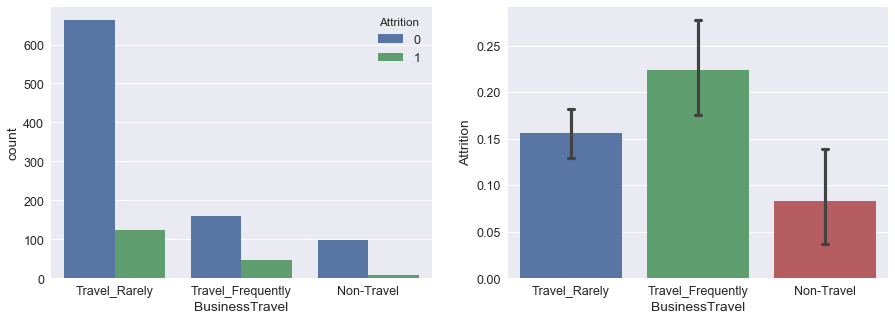

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5)) 
sns.countplot(x='BusinessTravel',hue='Attrition',data=train_data, ax=ax1)
sns.barplot(x='BusinessTravel',y='Attrition',data=train_data,capsize=.05,ax=ax2)
#显示BusinessTravel各个类型的离职率
plt.show()

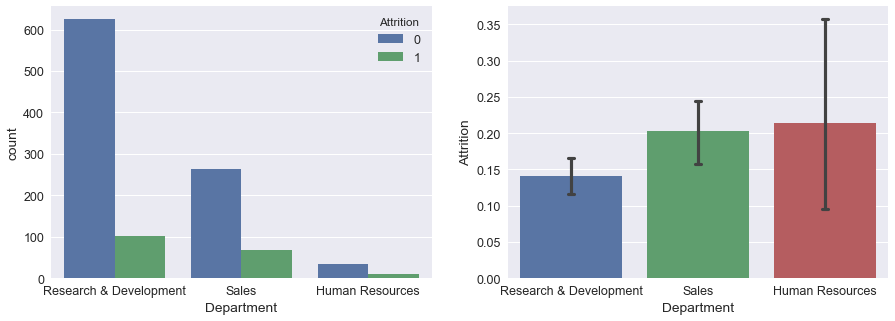

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5)) 
sns.countplot(x='Department',hue='Attrition',data=train_data, ax=ax1)
sns.barplot(x='Department',y='Attrition',data=train_data,capsize=.05,ax=ax2)
#显示Department各个类型的离职率
plt.show()

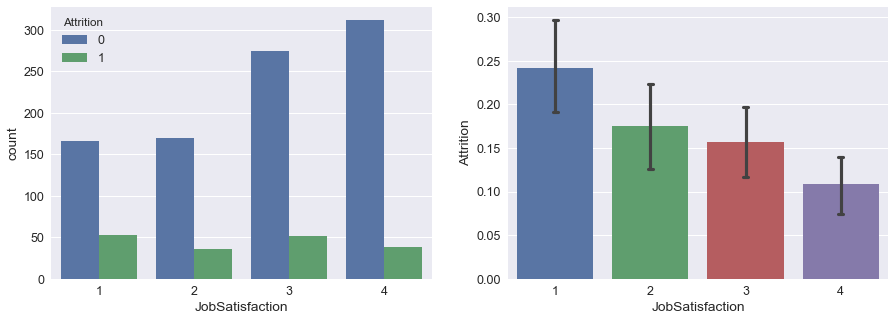

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5)) 
sns.countplot(x='JobSatisfaction',hue='Attrition',data=train_data, ax=ax1)
sns.barplot(x='JobSatisfaction',y='Attrition',data=train_data,capsize=.05,ax=ax2) 
plt.show() 
#显示JobSatisfaction各个类型的离职率

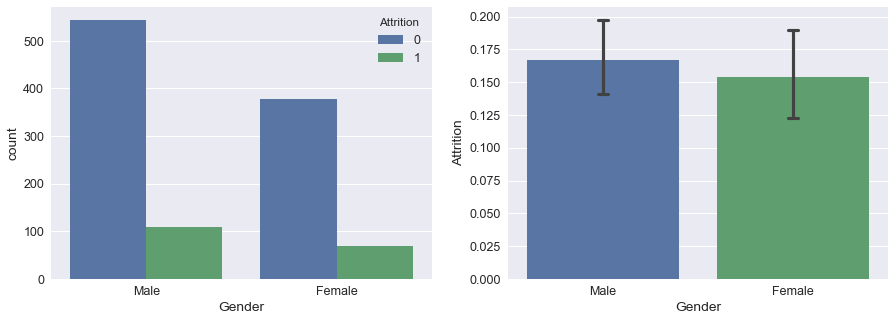

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5)) 
sns.countplot(x='Gender',hue='Attrition',data=train_data, ax=ax1)
sns.barplot(x='Gender',y='Attrition',data=train_data,capsize=.05,ax=ax2) 
plt.show()  
#显示Gender的离职率

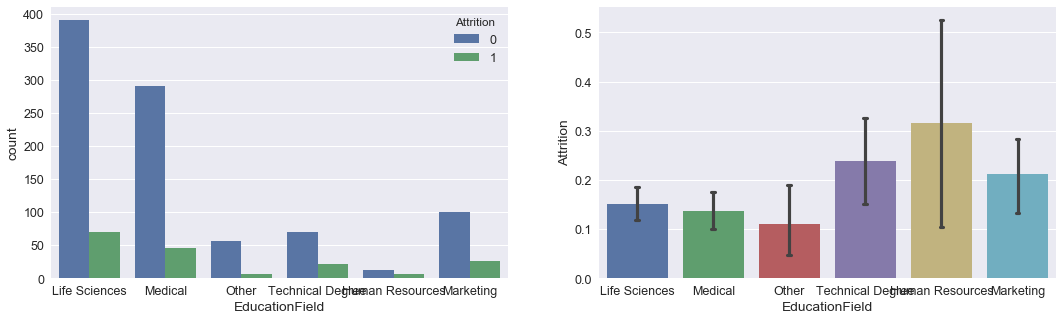

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5)) 
sns.countplot(x='EducationField',hue='Attrition',data=train_data, ax=ax1)
sns.barplot(x='EducationField',y='Attrition',data=train_data,capsize=.05,ax=ax2) 
plt.show()   
#显示EducationField的离职率

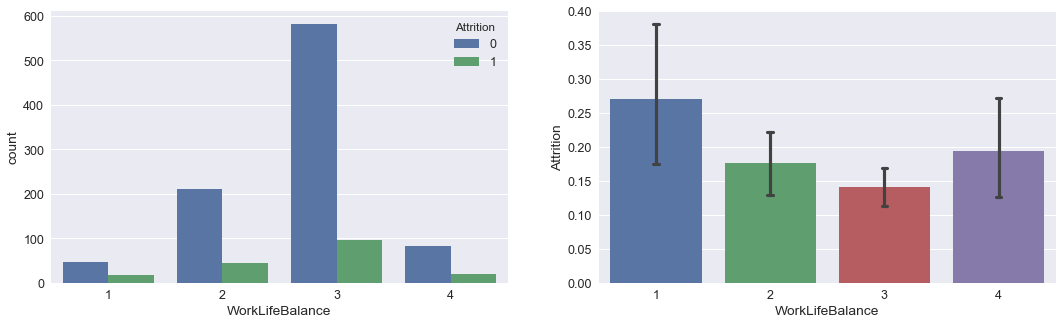

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5)) 
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=train_data, ax=ax1)
sns.barplot(x='WorkLifeBalance',y='Attrition',data=train_data,capsize=.05,ax=ax2) 
plt.show()   
#显示WorkLifeBalance的离职率

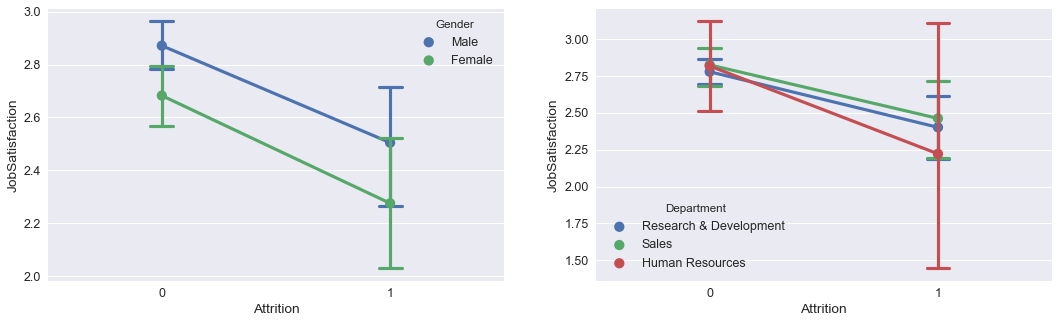

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5)) 
sns.pointplot(x='Attrition',y='JobSatisfaction',data=train_data,hue='Gender',capsize=.1,ax=ax1)
sns.pointplot(x='Attrition',y='JobSatisfaction',data=train_data,hue='Department',capsize=.1,ax=ax2)
##离职和不离职的人JobSatisfaction趋势.添加了一个部门观测值 
plt.show()    
##离职和不离职的人JobSatisfaction趋势.添加了一个性别观测值，可以看到女性对工作满意度普遍低于男性

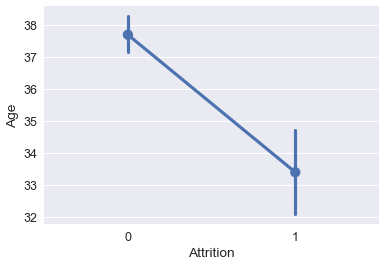

In [15]:
sns.pointplot(x='Attrition',y='Age',data=train_data)
##离职和不离职的人age趋势

In [16]:
def convertBool2Int(x):
    if x == 'Y' or x == 'Yes'or x == 'Male':
        return 1
    elif x == 'N' or x == 'No'or x == 'Female':
        return 0
    else:
        return 0

In [17]:
##trans
train_data[[ 'OverTime','Gender']] =train_data[[ 'OverTime','Gender']].applymap(str).applymap(convertBool2Int)  
##onehot
BusinessTravel = pd.get_dummies(train_data.BusinessTravel,prefix='bt') 
Department = pd.get_dummies(train_data.Department,prefix='d') 
EducationField = pd.get_dummies(train_data.EducationField,prefix='ef') 
JobRole= pd.get_dummies(train_data.JobRole,prefix='j') 
MaritalStatus= pd.get_dummies(train_data.MaritalStatus,prefix='ms') 

In [18]:
 
features=['Age',  'DistanceFromHome',
       'Education',  'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobSatisfaction', 
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
trainData = pd.concat([train_data[features],BusinessTravel,Department, EducationField, JobRole,MaritalStatus], axis = 1)

target =train_data['Attrition'] 
trainData.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,j_Laboratory Technician,j_Manager,j_Manufacturing Director,j_Research Director,j_Research Scientist,j_Sales Executive,j_Sales Representative,ms_Divorced,ms_Married,ms_Single
0,37,1,4,1,1,2,3,5993,1,0,...,0,0,1,0,0,0,0,1,0,0
1,54,1,4,4,0,3,3,10502,7,0,...,0,0,1,0,0,0,0,1,0,0
2,34,7,3,1,1,1,3,6074,1,1,...,1,0,0,0,0,0,0,0,0,1
3,39,1,1,4,0,2,4,12742,1,0,...,0,0,1,0,0,0,0,0,1,0
4,28,1,3,1,1,2,2,2596,1,0,...,1,0,0,0,0,0,0,1,0,0


In [19]:
trainData.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'Gender', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'bt_Non-Travel',
       'bt_Travel_Frequently', 'bt_Travel_Rarely', 'd_Human Resources',
       'd_Research & Development', 'd_Sales', 'ef_Human Resources',
       'ef_Life Sciences', 'ef_Marketing', 'ef_Medical', 'ef_Other',
       'ef_Technical Degree', 'j_Healthcare Representative',
       'j_Human Resources', 'j_Laboratory Technician', 'j_Manager',
       'j_Manufacturing Director', 'j_Research Director',
       'j_Research Scientist', 'j_Sales Executive', 'j_Sales Representative',
       'ms_Divorced', 'ms_Married', 'ms_Single'],
      dtype='object')

In [20]:
##trans
test_data[['OverTime','Gender']] =test_data[['OverTime','Gender']].applymap(str).applymap(convertBool2Int)  
test_BusinessTravel = pd.get_dummies(test_data.BusinessTravel,prefix='bt') 
test_Department = pd.get_dummies(test_data.Department,prefix='d') 
test_EducationField = pd.get_dummies(test_data.EducationField,prefix='ef') 
test_JobRole= pd.get_dummies(test_data.JobRole,prefix='j') 
test_MaritalStatus= pd.get_dummies(test_data.MaritalStatus,prefix='ms') 
testData = pd.concat([test_data[features],test_BusinessTravel,test_Department, test_EducationField,test_JobRole,test_MaritalStatus], axis = 1)
testData.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'Gender', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'bt_Non-Travel',
       'bt_Travel_Frequently', 'bt_Travel_Rarely', 'd_Human Resources',
       'd_Research & Development', 'd_Sales', 'ef_Human Resources',
       'ef_Life Sciences', 'ef_Marketing', 'ef_Medical', 'ef_Other',
       'ef_Technical Degree', 'j_Healthcare Representative',
       'j_Human Resources', 'j_Laboratory Technician', 'j_Manager',
       'j_Manufacturing Director', 'j_Research Director',
       'j_Research Scientist', 'j_Sales Executive', 'j_Sales Representative',
       'ms_Divorced', 'ms_Married', 'ms_Single'],
      dtype='object')

In [21]:
var =[ 'bt_Non-Travel','bt_Travel_Frequently', 'bt_Travel_Rarely', 'd_Human Resources',
       'd_Research & Development', 'd_Sales', 'ef_Human Resources',
       'ef_Life Sciences', 'ef_Marketing', 'ef_Medical', 'ef_Other',
       'ef_Technical Degree', 'j_Healthcare Representative',
       'j_Human Resources', 'j_Laboratory Technician', 'j_Manager',
       'j_Manufacturing Director', 'j_Research Director',
       'j_Research Scientist', 'j_Sales Executive', 'j_Sales Representative',
       'ms_Divorced', 'ms_Married', 'ms_Single']
trainData.drop(['bt_Travel_Rarely','d_Human Resources', 'ef_Other','j_Sales Representative','ms_Single'],axis=1,inplace=True)
testData.drop(['bt_Travel_Rarely','d_Human Resources', 'ef_Other','j_Sales Representative','ms_Single'],axis=1,inplace=True)
##0.905714 准确率

# 2.归一化后用LR模型，val好于未归一化的，test为（0.888571）

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trainData)
trainData_scale = scaler.transform(trainData) 

In [23]:
testData_scale = scaler.transform(testData)

In [27]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val =train_test_split(trainData_scale, target,test_size=0.2)
clf_scale = LogisticRegression(random_state=0,penalty='l1' )
# clf_scale.fit(trainData_scale, target)
clf_scale.fit(X_train, y_train)
clf_scale.score(X_val, y_val)

0.8863636363636364

In [28]:
df_coef = pd.DataFrame(index=trainData.columns,data=np.transpose(clf_scale.coef_))
df_coef['abs'] = df_coef.iloc[:,0].abs()
df_coef = df_coef.sort_values(by='abs', ascending=False)
print(df_coef.head(5)) 

                                0       abs
OverTime                 1.881539  1.881539
Age                     -1.678629  1.678629
YearsInCurrentRole      -1.438085  1.438085
YearsSinceLastPromotion  1.276547  1.276547
JobSatisfaction         -1.196782  1.196782


In [29]:
y_test = clf_scale.predict(testData_scale) 
df_test = pd.DataFrame(y_test,columns=['result'])
df_test.to_csv("sample_scale_drop.csv",index=0,header=1,columns=['result'])

# 0.RFE选择特征后用Random Forest

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trainData)
trainData_scale = scaler.transform(trainData) 
testData_scale = scaler.transform(testData)

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 30)
rfe = rfe.fit(trainData_scale, target)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True False  True  True
 False  True False  True  True  True  True False  True  True False  True
  True  True]
[1 1 4 1 1 1 1 1 1 1 2 1 1 1 1 8 1 1 1 1 1 6 1 1 5 1 9 1 1 1 1 3 1 1 7 1 1
 1]


In [40]:
trainData_scale.shape

(1100, 38)

In [45]:
trainData_scale[:,[1,2]] 

array([[0.        , 0.75      ],
       [0.        , 0.75      ],
       [0.21428571, 0.5       ],
       ...,
       [0.53571429, 0.75      ],
       [0.21428571, 0.        ],
       [0.03571429, 0.5       ]])

In [35]:
#选择rfe.support_是true的数据
features_var =[0,1,3,4,5,6,7,8,11,12,13,14,16,17,18,19,20,22,23,25,27,28,29,30,32,33,35,36,37]

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
trainDataSe =trainData_scale[:,[0,1,3,4,5,6,7,8,11,12,13,14,16,17,18,19,20,22,23,25,27,28,29,30,32,33,35,36,37]] 
X_train,X_val,y_train,y_val =train_test_split(trainDataSe, target,test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_val, rf.predict(X_val))))

Random Forest Accuracy: 0.818


In [49]:
testDataSe =testData_scale[:,[0,1,3,4,5,6,7,8,11,12,13,14,16,17,18,19,20,22,23,25,27,28,29,30,32,33,35,36,37]] 
y_test = rf.predict(testDataSe) 

In [50]:
df_test = pd.DataFrame(y_test,columns=['result'])
df_test.to_csv("sample_rf.csv",index=0,header=1,columns=['result'])

# 1.直接LR模型,val表现不是太好，但是test为（0.874286）

In [54]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val =train_test_split(trainData, target,test_size=0.2)
clf = LogisticRegression(random_state=0, solver='lbfgs' )
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

0.8454545454545455

In [55]:
y_test = clf.predict(testData_scale) 

In [56]:
df_test = pd.DataFrame(y_test,columns=['result'])
df_test.to_csv("sample_noscale.csv",index=0,header=1,columns=['result'])

# 3.pca降维后用LR模型，降维后没有看到变化，没提交

1.降维效果不太好，特征数据比较分散，没有几个特征贡献率和很高的情况

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(trainData_scale)
X_pca=pca.transform(trainData_scale)
print(pca.explained_variance_ratio_)  
print("pca reserved percent=",pca.explained_variance_ratio_.sum())  
X_train, X_val, y_train, y_val = train_test_split(X_pca, target, test_size=0.2, random_state=42)
reg_pca = LogisticRegression().fit(X_train, y_train) 
print("train_val=",reg_pca.score(X_val,y_val) )


[0.15355537 0.08639357 0.07624677 0.05935454 0.05107532 0.04948934
 0.04497724 0.03762264 0.03604883 0.03392498 0.03264719 0.03082399
 0.0290741  0.02514667 0.02346541 0.02206755 0.02117212 0.01979623
 0.01947542 0.01803989 0.01577304 0.01468961 0.01341297 0.01312934
 0.01253725 0.01220911 0.01001738 0.00782542 0.00686035 0.00602085]
pca reserved percent= 0.9828724798388502
train_val= 0.8545454545454545


In [58]:
X_test = testData
X_test_pca=pca.transform(testData_scale)
y_test=reg_pca.predict(X_test_pca) 
df = pd.DataFrame (y_test, columns = ['result'])
df.to_csv("sample_pca.csv",encoding = "utf-8",header=1,index=0)

# 4.考虑gbdt进行特征选择后用LR模型

In [62]:
from sklearn.model_selection import train_test_split
X_train_lr, X_1, y_train_lr, y_1 = train_test_split(trainData, target, test_size=0.5, random_state=42)
X_gbdt,X_val, y_gbdt,y_val = train_test_split(X_1, y_1, test_size=0.1, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression  
def GBDTLR():
    GBDT = GradientBoostingClassifier(n_estimators=10)
    GBDT.fit(X_gbdt, y_gbdt)
    OHE = OneHotEncoder()
    OHE.fit(GBDT.apply(X_gbdt)[:, :, 0])
    LR = LogisticRegression()
    LR.fit(OHE.transform(GBDT.apply(X_train_lr)[:, :, 0]), y_train_lr)
    #test
    X_t_trans = OHE.transform(GBDT.apply(X_val)[:, :, 0])
    auc = LR.score(X_t_trans, y_val)
    print('GradientBoosting + LogisticRegression: ', auc)
    X_test_trans = OHE.transform(GBDT.apply(testData)[:, :, 0])
    Y_test = LR.predict(X_test_trans)
    df = pd.DataFrame (Y_test, columns = ['result'])
    df.to_csv("sample_gbdtlr.csv",encoding = "utf-8",header=1,index=0)
#     return Y_test

In [64]:
GBDTLR()

GradientBoosting + LogisticRegression:  0.7636363636363637


# 5.直接用xgboost

In [65]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train, X_val, y_train, y_val = train_test_split(trainData, target, test_size=0.7, random_state=42)

In [66]:
def XGBoostTest():
    XGBmodel = xgb.XGBClassifier(nthread=4, learning_rate=0.08, n_estimators=100,colsample_bytree=0.85, max_depth =6)
#     XGBmodel.fit(trainData, target)
    XGBmodel.fit(X_train, y_train)
#     y_pred = XGB.predict(X_val) 
    auc = XGBmodel.score(X_val,y_val)
    print('XGBoost: ', auc) 
    Y_test = XGBmodel.predict(testData)
    df = pd.DataFrame (Y_test, columns = ['result'])
    df.to_csv("sample_xgb.csv",encoding = "utf-8",header=1,index=0)

In [67]:
XGBoostTest()

XGBoost:  0.8675324675324675


D:\IDE\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\IDE\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
